In [1]:
from edward.util import Progbar
from keras.layers import Dense
from observations import mnist
import edward as ed
import numpy as np
import os
import tensorflow as tf
from edward.models import Bernoulli, Normal
from utils import generator
from matplotlib import pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
sess = tf.InteractiveSession()
d = 2
M = 100
(x_train, _), (x_test, _) = mnist('./data')
x_train_generator = generator(x_train, M)

In [3]:
z = Normal(loc=tf.zeros([M, d]), scale=tf.ones([M, d]))
hidden = Dense(256, activation='relu')(z.value())
x = Bernoulli(logits=Dense(28 * 28)(hidden))
#x = Normal(loc = Dense(28 * 28)(hidden),scale = Dense(28 * 28,activation = 'softplus')(hidden))

x_ph = tf.placeholder(tf.int32, [None, 28 * 28])
hidden = Dense(256, activation='relu')(tf.cast(x_ph, tf.float32))
qz = Normal(loc=Dense(d)(hidden),
            scale=Dense(d, activation='softplus')(hidden))

In [4]:
inference = ed.KLqp({z: qz}, data={x: x_ph})
optimizer = tf.train.RMSPropOptimizer(0.01, epsilon=1.0)
inference.initialize(optimizer=optimizer)
tf.global_variables_initializer().run()

In [5]:
n_epoch = 100
n_iter_per_epoch = x_train.shape[0] // M
log_loss = []
for epoch in range(1, n_epoch + 1):
  print("Epoch: {0}".format(epoch))
  avg_loss = 0.0

  pbar = Progbar(n_iter_per_epoch)
  for t in range(1, n_iter_per_epoch + 1):
    pbar.update(t)
    x_batch = next(x_train_generator)
    info_dict = inference.update(feed_dict={x_ph: x_batch})
    avg_loss += info_dict['loss']
  avg_loss = avg_loss / n_iter_per_epoch
  avg_loss = avg_loss / M
  log_loss.append(-avg_loss)
  print("-log p(x) <= {:0.3f}".format(avg_loss))

Epoch: 1
600/600 [100%] ██████████████████████████████ Elapsed: 9s
-log p(x) <= 189.148
Epoch: 2
600/600 [100%] ██████████████████████████████ Elapsed: 8s
-log p(x) <= 168.990
Epoch: 3
600/600 [100%] ██████████████████████████████ Elapsed: 8s
-log p(x) <= 165.999
Epoch: 4
600/600 [100%] ██████████████████████████████ Elapsed: 8s
-log p(x) <= 164.053
Epoch: 5
600/600 [100%] ██████████████████████████████ Elapsed: 8s
-log p(x) <= 163.014
Epoch: 6
600/600 [100%] ██████████████████████████████ Elapsed: 8s
-log p(x) <= 162.149
Epoch: 7
600/600 [100%] ██████████████████████████████ Elapsed: 8s
-log p(x) <= 161.472
Epoch: 8
600/600 [100%] ██████████████████████████████ Elapsed: 8s
-log p(x) <= 161.013
Epoch: 9
600/600 [100%] ██████████████████████████████ Elapsed: 8s
-log p(x) <= 160.693
Epoch: 10
600/600 [100%] ██████████████████████████████ Elapsed: 8s
-log p(x) <= 160.435
Epoch: 11
600/600 [100%] ██████████████████████████████ Elapsed: 8s
-log p(x) <= 160.072
Epoch: 12
600/600 [100%] █████

600/600 [100%] ██████████████████████████████ Elapsed: 8s
-log p(x) <= 157.204
Epoch: 94
600/600 [100%] ██████████████████████████████ Elapsed: 8s
-log p(x) <= 157.147
Epoch: 95
600/600 [100%] ██████████████████████████████ Elapsed: 8s
-log p(x) <= 157.128
Epoch: 96
600/600 [100%] ██████████████████████████████ Elapsed: 8s
-log p(x) <= 157.167
Epoch: 97
600/600 [100%] ██████████████████████████████ Elapsed: 8s
-log p(x) <= 157.147
Epoch: 98
600/600 [100%] ██████████████████████████████ Elapsed: 8s
-log p(x) <= 157.029
Epoch: 99
600/600 [100%] ██████████████████████████████ Elapsed: 8s
-log p(x) <= 157.170
Epoch: 100
600/600 [100%] ██████████████████████████████ Elapsed: 8s
-log p(x) <= 157.216


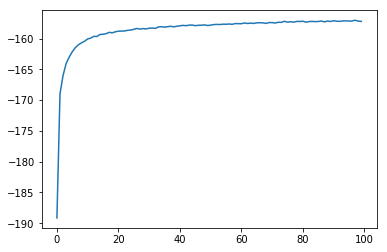

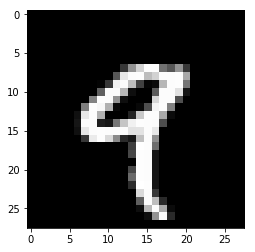

In [6]:
plt.plot(range(n_epoch),log_loss)
plt.show()
img = x_train[4,:].reshape(28,28)
plt.imshow(img, cmap='gray')
plt.show()

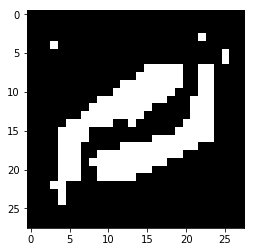

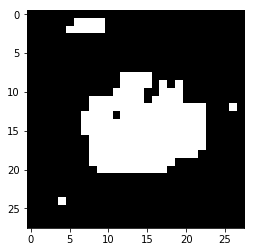

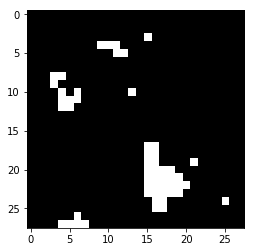

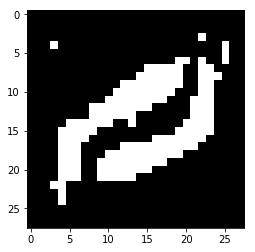

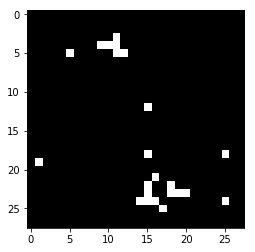

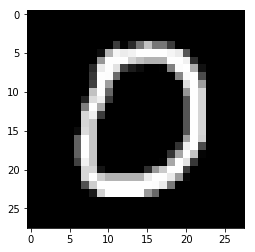

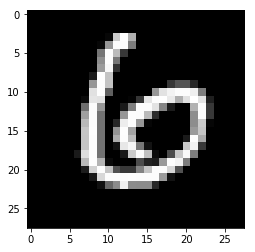

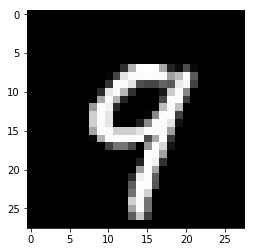

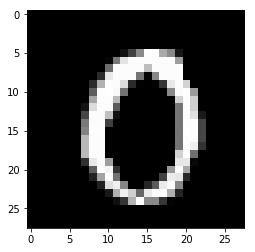

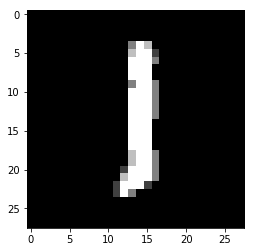

In [7]:
#sample_img = sess.run(x,feed_dict = {z:sampe_z})

sample_z = sess.run(qz, feed_dict = {x_ph: x_test[:100,:]})
img = sess.run(x, feed_dict = {z: sample_z})

for i in range(5):
    plt.imshow(img[i+10,:].reshape(28,28),cmap = 'gray')
    plt.show()
for i in range(5):
    plt.imshow(x_test[i+10,:].reshape(28,28),cmap = 'gray')
    plt.show()

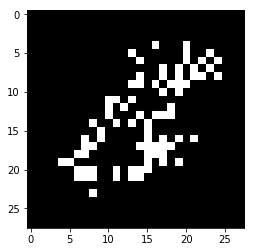

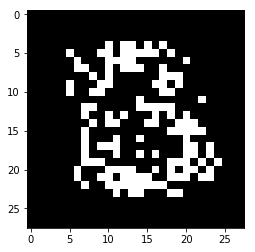

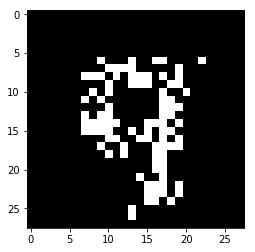

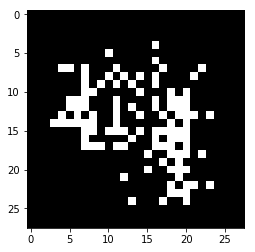

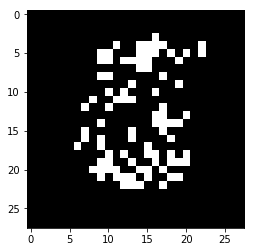

In [8]:
img = x.sample().eval()

for i in range(5):
    plt.imshow(img[i,:].reshape(28,28),cmap = 'gray')
    plt.show()
